In [108]:
import numpy as np
import pandas as pd

import sklearn.datasets as datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from matplotlib.pyplot import figure


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
dataset = datasets.load_breast_cancer()
df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
df['Target'] = dataset.target
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension   ...    worst texture  worst perimeter  worst area  \
0                 0.07871   ...            17.33           184.60      2019.0   
1                 0.05667   ...            23.41           158.80      1956.0   
2                 0.05999   ...            25.53           152.50      1709.0   
3                 0.09744   ...            26.50            98.87       567.7   
4                 0.05883   ...            16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  Target  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  
3          0.6638                  0.17300       0  
4          0.2364                  0.07678       0  

[5 rows x 31 columns]

In [17]:
X = np.array(df.drop(['Target'], axis=1))
y = np.array(df['Target'])

In [20]:
#Lets standardise and visualise the data on 2 principal components
X_scaled = StandardScaler().fit_transform(X)
y_sclaed = y

pca = PCA(n_components=2)
pc = pca.fit_transform(X_scaled)
df_scaled = pd.DataFrame(data=pc, columns=['PC1', 'PC2'])
df_scaled['Target'] = y
df_scaled.head()

PC1        PC2  Target
0  9.192837   1.948583       0
1  2.387802  -3.768172       0
2  5.733896  -1.075174       0
3  7.122953  10.275589       0
4  3.935302  -1.948072       0

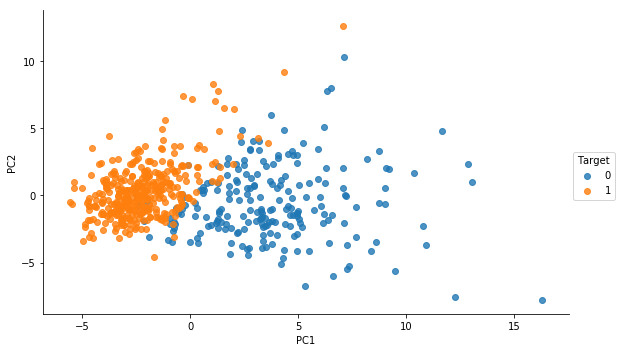

In [22]:
sns.lmplot(x='PC1', y='PC2', hue='Target', data=df_scaled, fit_reg=False, aspect=1.618034)
plt.show()

In [31]:
#Randomly split into random train/test 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
#Make an SVC classifier and report a confusion matrix
model = SVC(probability=True).fit(X_train, y_train)
sv_predictions = model.predict(X_test)
print confusion_matrix(y_test, sv_predictions)
print accuracy_score(y_test, sv_predictions)

[[  0  63]
 [  0 108]]
0.631578947368421


In [37]:
#Make a KNN classifier and report a confusion matrix
model = KNeighborsClassifier().fit(X_train, y_train)
knn_predictions = model.predict(X_test)
print confusion_matrix(y_test, knn_predictions)
print accuracy_score(y_test, knn_predictions)

[[ 57   6]
 [  1 107]]
0.9590643274853801


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

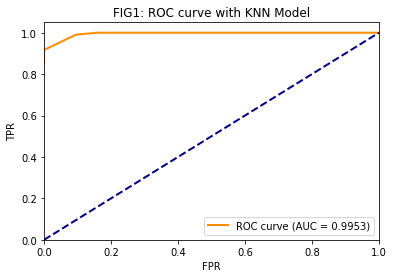

In [77]:
#3b K ROC
model = KNeighborsClassifier().fit(X_train, y_train)
k_probs = model.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, k_probs[:, 1])
roc_auc = auc(fpr, tpr) 

# plot results
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve with KNN Model')
plt.legend(loc="lower right");   
plt.show()

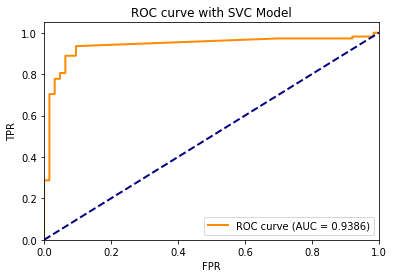

In [78]:
#And now for the SVC
model = SVC(probability=True).fit(X_train, y_train)
sv_probs = model.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, sv_probs[:, 1])
roc_auc = auc(fpr, tpr) 

# plot results
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve with SVC Model')
plt.legend(loc="lower right");   
plt.show()

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [125]:
#10 fold cv to find optimal k
kf=KFold(n_splits=10, shuffle=True, random_state=None)
data = np.array([[np.nan, np.nan]])

for i in range(10):
    for k in range(1,21):
        model = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(model, X, y, cv=kf)
        for score in scores:
            data = np.r_[data, np.array([[k, score]])]
df = pd.DataFrame(data=data, columns=['K', 'Score'])
df.dropna(inplace=True)
df

K     Score
1      1.0  0.877193
2      1.0  0.912281
3      1.0  0.929825
4      1.0  0.912281
5      1.0  0.877193
6      1.0  0.947368
7      1.0  0.877193
8      1.0  0.929825
9      1.0  0.947368
10     1.0  0.928571
11     2.0  0.894737
12     2.0  0.912281
13     2.0  0.894737
14     2.0  0.912281
15     2.0  0.912281
16     2.0  0.929825
17     2.0  0.912281
18     2.0  0.894737
19     2.0  0.929825
20     2.0  0.910714
21     3.0  0.929825
22     3.0  0.912281
23     3.0  0.877193
24     3.0  0.947368
25     3.0  0.947368
26     3.0  0.877193
27     3.0  0.964912
28     3.0  0.894737
29     3.0  0.964912
30     3.0  0.928571
...    ...       ...
1971  18.0  0.929825
1972  18.0  0.947368
1973  18.0  0.964912
1974  18.0  0.929825
1975  18.0  0.807018
1976  18.0  0.947368
1977  18.0  0.912281
1978  18.0  0.947368
1979  18.0  1.000000
1980  18.0  0.946429
1981  19.0  0.929825
1982  19.0  1.000000
1983  19.0  0.929825
1984  19.0  0.947368
1985  19.0  0.964912
1986  19.0  0.894737
1987  19.0  0.947368
1988  19.0  0.894737
1989  19.0  0.877193
1990  19.0  0.928571
1991  20.0  0.982456
1992  20.0  0.912281
1993  20.0  0.947368
1994  20.0  0.877193
1995  20.0  0.912281
1996  20.0  0.964912
1997  20.0  0.964912
1998  20.0  0.894737
1999  20.0  0.929825
2000  20.0  0.928571

[2000 rows x 2 columns]

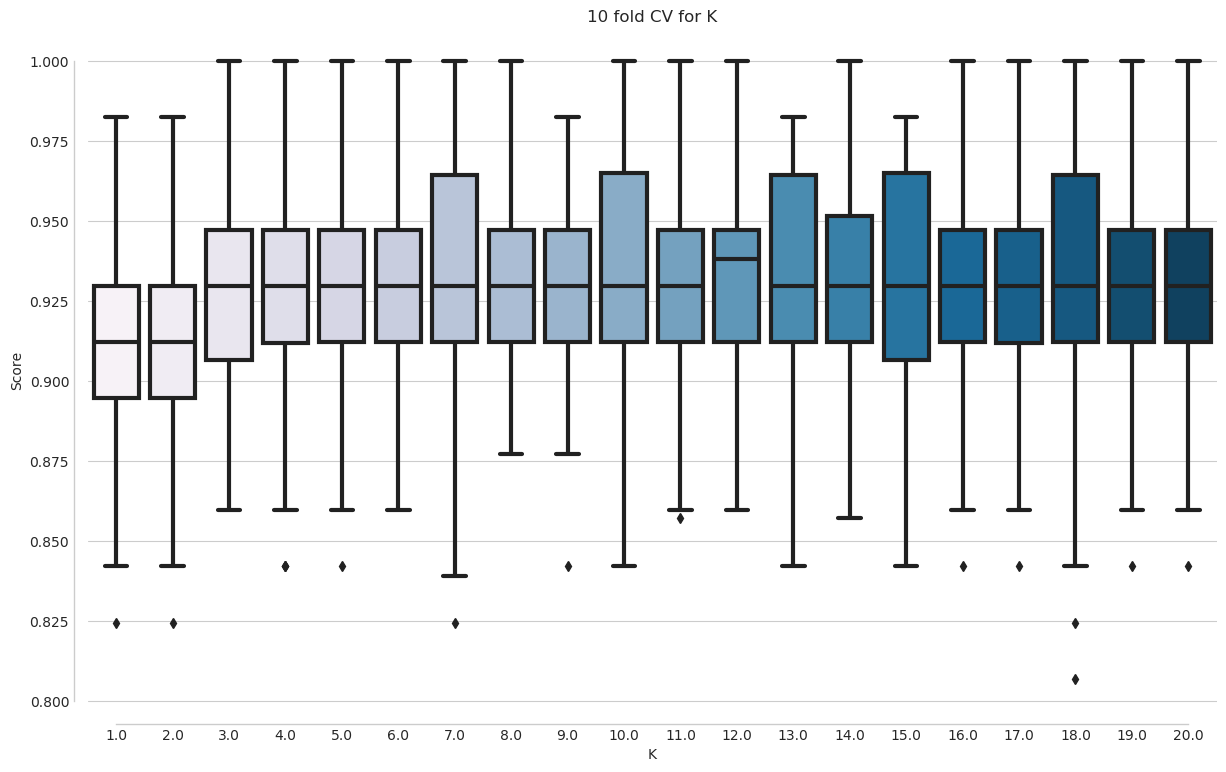

In [126]:
figure(num=None, figsize=(14.5623, 9), dpi=100, facecolor='w', edgecolor='k') # determine a nice size
sns.set_style("whitegrid") 
ax = sns.boxplot(x='K', y='Score', data=df, palette="PuBu", linewidth=3).set_title("10 fold CV for K")
sns.despine(offset=10, trim=True)

### Wow so it looks like k=12, even though slightly more varied than k=10, has a higher mean and similar upper 75% of scores. Would we go with k=12 then?